In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=Warning)
%matplotlib inline

# Dataset


In [15]:
d = pd.read_csv('/media/loop/Backup/vm/tos1/quic/offline/quic_average.csv')
#d = d[(d[['Resolution(w)']] != 0).all(axis=1)]
d.isnull().values.any()
# drop rows with missing values
d.dropna(inplace=True)
X=d.iloc[:, 15:235] 
#Y=d.iloc[:,11]
Y=d.loc[:,d.columns.isin(['Avg_mos'])]
Y.dropna(inplace=True)

In [16]:
X.shape

(406, 146)

In [4]:
# Y['Stall_ratio'] = np.where((Y['Stall_ratio'] >0) & (Y['Stall_ratio'] <=2) , 0.1, Y['Stall_ratio'])

# Features

In [17]:
X.columns=(['DL_Th_avg_S','DL_Th_medn_S','DL_Th_max_S','DL_Th_min_S','DL_Th_std_S','DL_Th_avg-f25_S','DL_Th_avg-f50_S','DL_Th_avg-l25_S','DL_Th_avg-l50_S','DL_Th_p-10_S','DL_Th_p-20_S','DL_Th_p-30_S','DL_Th_p-40_S','DL_Th_p-50_S', 'DL_Th_p-60_S','DL_Th_p-70_S','DL_Th_p-80_S','DL_Th_p-90_S',
'UL_Th_avg_S','UL_Th_medn_S','UL_Th_max_S','UL_Th_min_S','UL_Th_std_S','UL_Th_avg-f25_S','UL_Th_avg-f50_S','UL_Th_avg-l25_S','UL_Th_avg-l50_S','UL_Th_p-10_S','UL_Th_p-20_S','UL_Th_p-30_S','UL_Th_p-40_S','UL_Th_p-50_S', 'UL_Th_p-60_S','UL_Th_p-70_S','UL_Th_p-80_S','UL_Th_p-90_S',
'DL_Pkt-N_total_S','DL_Pkt-N_mean_S','DL_Pkt-N_medn_S','DL_Pkt-N_max_S','DL_Pkt-N_min_S','DL_Pkt-N_std_S','DL_Pkt-N_total-f25_S','DL_Pkt-N_total-f50_S','DL_Pkt-N_total-l25_S','DL_Pkt-N_total-l50_S','DL_Pkt-N_p-10_S','DL_Pkt-N_p-20_S','DL_Pkt-N_p-30_S','DL_Pkt-N_p-40_S','DL_Pkt-N_p-50_S', 'DL_Pkt-N_p-60_S','DL_Pkt-N_p-70_S','DL_Pkt-N_p-80_S','DL_Pkt-N_p-90_S',
'UL_Pkt-N_total_S','UL_Pkt-N_mean_S','UL_Pkt-N_medn_S','UL_Pkt-N_max_S','UL_Pkt-N_min_S','UL_Pkt-N_std_S','UL_Pkt-N_total-f25_S','UL_Pkt-N_total-f50_S','UL_Pkt-N_total-l25_S','UL_Pkt-N_total-l50_S','UL_Pkt-N_p-10_S','UL_Pkt-N_p-20_S','UL_Pkt-N_p-30_S','UL_Pkt-N_p-40_S','UL_Pkt-N_p-50_S', 'UL_Pkt-N_p-60_S','UL_Pkt-N_p-70_S','UL_Pkt-N_p-80_S','UL_Pkt-N_p-90_S',  
#'DL_Pkt-N-g100_total_S','DL_Pkt-N-g100_mean_S','DL_Pkt-N-g100_medn_S','DL_Pkt-N-g100_max_S','DL_Pkt-N-g100_min_S','DL_Pkt-N-g100_std_S','DL_Pkt-N-g100_total-f25_S','DL_Pkt-N-g100_total-f50_S','DL_Pkt-N-g100_total-l25_S','DL_Pkt-N-g100_total-l50_S','DL_Pkt-N-g100_p-10_S','DL_Pkt-N-g100_p-20_S','DL_Pkt-N-g100_p-30_S','DL_Pkt-N-g100_p-40_S','DL_Pkt-N-g100_p-50_S', 'DL_Pkt-N-g100_p-60_S','DL_Pkt-N-g100_p-70_S','DL_Pkt-N-g100_p-80_S','DL_Pkt-N-g100_p-90_S', 
#'UL_Pkt-N-g100_total_S','UL_Pkt-N-g100_mean_S','UL_Pkt-N-g100_medn_S','UL_Pkt-N-g100_max_S','UL_Pkt-N-g100_min_S','UL_Pkt-N-g100_std_S','UL_Pkt-N-g100_total-f25_S','UL_Pkt-N-g100_total-f50_S','UL_Pkt-N-g100_total-l25_S','UL_Pkt-N-g100_total-l50_S','UL_Pkt-N-g100_p-10_S','UL_Pkt-N-g100_p-20_S','UL_Pkt-N-g100_p-30_S','UL_Pkt-N-g100_p-40_S','UL_Pkt-N-g100_p-50_S', 'UL_Pkt-N-g100_p-60_S','UL_Pkt-N-g100_p-70_S','UL_Pkt-N-g100_p-80_S','UL_Pkt-N-g100_p-90_S',
'DL_Pkt-S_mean_S','DL_Pkt-S_medn_S','DL_Pkt-S_max_S','DL_Pkt-S_min_S','DL_Pkt-S_std_S','DL_Pkt-S_mean-f25_S','DL_Pkt-S_mean-f50_S','DL_Pkt-S_mean-l25_S','DL_Pkt-S_mean-l50_S','DL_Pkt-S_p-10_S','DL_Pkt-S_p-20_S','DL_Pkt-S_p-30_S','DL_Pkt-S_p-40_S','DL_Pkt-S_p-50_S', 'DL_Pkt-S_p-60_S','DL_Pkt-S_p-70_S','DL_Pkt-S_p-80_S','DL_Pkt-S_p-90_S',
'UL_Pkt-S_mean_S','UL_Pkt-S_medn_S','UL_Pkt-S_max_S','UL_Pkt-S_min_S','UL_Pkt-S_std_S','UL_Pkt-S_mean-f25_S','UL_Pkt-S_mean-f50_S','UL_Pkt-S_mean-l25_S','UL_Pkt-S_mean-l50_S','UL_Pkt-S_p-10_S','UL_Pkt-S_p-20_S','UL_Pkt-S_p-30_S','UL_Pkt-S_p-40_S','UL_Pkt-S_p-50_S', 'UL_Pkt-S_p-60_S','UL_Pkt-S_p-70_S','UL_Pkt-S_p-80_S','UL_Pkt-S_p-90_S',  
#'DL_Pkt-S-g100_mean_S','DL_Pkt-S-g100_medn_S','DL_Pkt-S-g100_max_S','DL_Pkt-S-g100_min_S','DL_Pkt-S-g100_std_S','DL_Pkt-S-g100_mean-f25_S','DL_Pkt-S-g100_mean-f50_S','DL_Pkt-S-g100_mean-l25_S','DL_Pkt-S-g100_mean-l50_S','DL_Pkt-S-g100_p-10_S','DL_Pkt-S-g100_p-20_S','DL_Pkt-S-g100_p-30_S','DL_Pkt-S-g100_p-40_S','DL_Pkt-S-g100_p-50_S', 'DL_Pkt-S-g100_p-60_S','DL_Pkt-S-g100_p-70_S','DL_Pkt-S-g100_p-80_S','DL_Pkt-S-g100_p-90_S', 
#'UL_Pkt-S-g100_mean_S','UL_Pkt-S-g100_medn_S','UL_Pkt-S-g100_max_S','UL_Pkt-S-g100_min_S','UL_Pkt-S-g100_std_S','UL_Pkt-S-g100_mean-f25_S','UL_Pkt-S-g100_mean-f50_S','UL_Pkt-S-g100_mean-l25_S','UL_Pkt-S-g100_mean-l50_S','UL_Pkt-S-g100_p-10_S','UL_Pkt-S-g100_p-20_S','UL_Pkt-S-g100_p-30_S','UL_Pkt-S-g100_p-40_S','UL_Pkt-S-g100_p-50_S', 'UL_Pkt-S-g100_p-60_S','UL_Pkt-S-g100_p-70_S','UL_Pkt-S-g100_p-80_S','UL_Pkt-S-g100_p-90_S',
'DL_IA_mean_S','DL_IA_medn_S','DL_IA_max_S','DL_IA_min_S','DL_IA_std_S','DL_IA_mean-f25_S','DL_IA_mean-f50_S','DL_IA_mean-l25_S','DL_IA_mean-l50_S','DL_IA_p-10_S','DL_IA_p-20_S','DL_IA_p-30_S','DL_IA_p-40_S','DL_IA_p-50_S', 'DL_IA_p-60_S','DL_IA_p-70_S','DL_IA_p-80_S','DL_IA_p-90_S',
'UL_IA_mean_S','UL_IA-S_medn_S','UL_IA_max_S','UL_IA_min_S','UL_IA_std_S','UL_IA_mean-f25_S','UL_IA_mean-f50_S','UL_IA_mean-l25_S','UL_IA_mean-l50_S','UL_IA_p-10_S','UL_IA_p-20_S','UL_IA_p-30_S','UL_IA_p-40_S','UL_IA_p-50_S', 'UL_IA_p-60_S','UL_IA_p-70_S','UL_IA_p-80_S','UL_IA_p-90_S'    
])

# Target

In [18]:
yy=Y['Avg_mos']

In [19]:
print(X.shape)
print(yy.shape)

(406, 146)
(406,)


# Distribution of Target

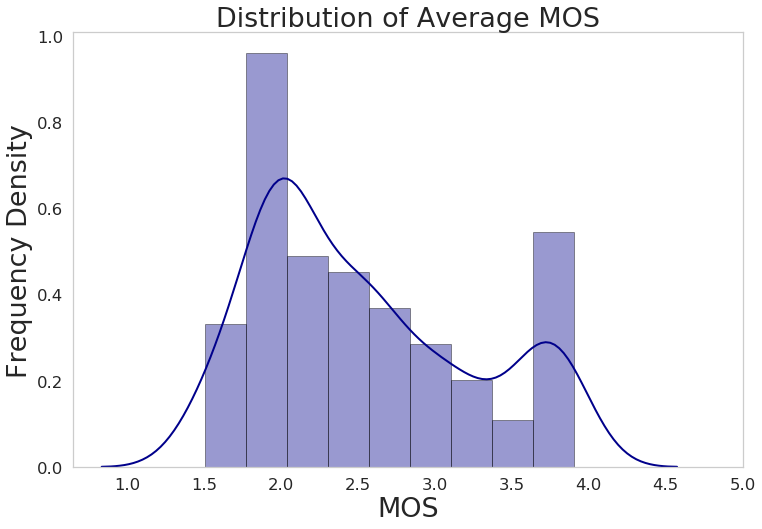

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
k=Y.to_numpy()
k=k.ravel()
sns.set(font_scale=1.5, style="whitegrid")
fig = plt.figure(figsize=(12,8))
plt.rcParams["axes.grid"] = False
ax = fig.add_subplot(111)
#df = pd.DataFrame(np.array([['a'], ['a'], ['b']]), columns=['current_status'])
ax=sns.distplot(k, hist=True, kde=True, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.grid(False)
plt.title('Distribution of Average MOS',fontsize=27)
plt.xlabel('MOS',fontsize=27)
plt.ylabel('Frequency Density',fontsize=27)
plt.xticks(np.arange(1, 5.5,0.5))
#plt.yticks(np.arange(0, 1200, 120))
#plt.xticks(np.arange(0, 45000,5000))
# plt.tick_params(axis='x',  colors='black')
# plt.tick_params(axis='y', colors='black')

plt.savefig('quic-mos-regr-dis.pdf')

# Model Benchmark

In [22]:
seed = 42

# prepare models
param_grids=[]

##linear
param_grids_0= {           
    'fit_intercept':['True'], 
    'normalize':['True','False']
}
param_grids.append(param_grids_0)

##knn
param_grids_1 = {                      
    'n_neighbors': [3,5,7,10,25]
}
param_grids.append(param_grids_1)



## Decision Tree
param_grids_2 = { 
    'criterion':['mse', 'mae'],
    'max_depth': [ 3, 10, 50, None],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 4, 8]
}

param_grids.append(param_grids_2)

## SVM
param_grids_3 = {  
     #'gamma' :['scale'],
     #'kernel' : [ 'rbf', 'poly'],
     #'degree' : [1,3,6],
     'C' : [0.01, 0.1, 1]

}
param_grids.append(param_grids_3)
 

### Random foresst
param_grids_4 = {      
    'max_depth': [ 3, 10, 50, 90, None],
    'max_features': ['auto'],
    'n_estimators': [100, 200,500],
    'min_samples_leaf': [1, 3 ,5],
    'min_samples_split':[2, 4, 8],
    
}
param_grids.append(param_grids_4)

### MLP
param_grids_5 = {    
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    #'activation': ['identity', 'logistic', 'tanh', 'relu'],
    #'solver': ['sgd', 'adam', 'lbfgs' ],
    'alpha': [0.0001, 0.05],
    #'learning_rate': ['constant','adaptive'],
}
param_grids.append(param_grids_5)

models = []
models.append((LinearRegression()))
models.append((KNeighborsRegressor()))
models.append((DecisionTreeRegressor()))
#models.append((GaussianNB()))
models.append((SVR()))
models.append((RandomForestRegressor()))
models.append((MLPRegressor()))


best_estimator=[]


for i in range(6):
    #print(param_grids[i])
    #param_grids= param_grids_%d' % (i))
    grid_search = GridSearchCV(estimator = models[i], param_grid = param_grids[i],  cv =5, n_jobs = -1, verbose = 1, return_train_score=True)
    grid_search.fit(X, yy)
    #print(grid_search.best_params_)
    
    best_estimator.append(grid_search.best_estimator_)
    
print('----------------------------------------')
print('Best parameters for seven algorithms')
print('----------------------------------------')
print()

for j in range(6):
    print( best_estimator[j])
    print('\n')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 161 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:  1.2min finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:    1.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.7s finished


----------------------------------------
Best parameters for seven algorithms
----------------------------------------

LinearRegression(copy_X=True, fit_intercept='True', n_jobs=None,
                 normalize='True')


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


RandomForestRegressor(bootstrap=True, ccp_

In [23]:
import warnings
warnings.filterwarnings('ignore')
import pickle

print('----------------------------------------')
#print('Box plot of all model cross validation accuracy')
print('----------------------------------------')
print()
# prepare configuration for cross validation test harness
seed = 42
# prepare models
models = []


models.append(('LR',  best_estimator[0])) #LogisticRegression()
models.append(('KNN', best_estimator[1])) #KNeighborsClassifier()))
models.append(('DTR', best_estimator[2])) #DecisionTreeClassifier()))
#models.append(('GNB', best_estimator[3]))
models.append(('SVR', best_estimator[3]))
models.append(('RFR', best_estimator[4]))
models.append(('MLP', best_estimator[5]))
# evaluate each model in turn
# evaluate each model in turn

ac = []
tr = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = model_selection.cross_validate(model, X, yy, cv=kfold)
    ac.append((cv_results['test_score']))
    tr.append((cv_results['fit_time'])/60)
    #names.append(name)
    
    a_msg = "R2-score %s: %f (%f)" % (name, ((cv_results['test_score'])).mean(), ((cv_results['test_score'])).std())
    t_msg = "Training time %s: %f (%f)" % (name, ((cv_results['fit_time'])/60).mean(),  ((cv_results['fit_time'])/60).std())
    print(a_msg)
    print(t_msg)
# boxplot algorithm comparison

----------------------------------------
----------------------------------------

R2-score LR: -25966584200025042944.000000 (51933168400050094080.000000)
Training time LR: 0.000167 (0.000012)
R2-score KNN: 0.639538 (0.057807)
Training time KNN: 0.000094 (0.000009)
R2-score DTR: 0.983614 (0.008870)
Training time DTR: 0.002001 (0.000351)
R2-score SVR: 0.195800 (0.025725)
Training time SVR: 0.000417 (0.000008)
R2-score RFR: 0.993581 (0.000944)
Training time RFR: 0.017593 (0.000241)
R2-score MLP: -5238087056709.671875 (2369822605836.140625)
Training time MLP: 0.014208 (0.002301)


# All Window

In [32]:
A_all=X.loc[:,X.columns.isin(['DL_Th_avg_S','DL_Th_medn_S','DL_Th_max_S','DL_Th_min_S','DL_Th_std_S','DL_Th_avg-f25_S','DL_Th_avg-f50_S','DL_Th_avg-l25_S','DL_Th_avg-l50_S','DL_Th_p-10_S','DL_Th_p-20_S','DL_Th_p-30_S','DL_Th_p-40_S','DL_Th_p-50_S', 'DL_Th_p-60_S','DL_Th_p-70_S','DL_Th_p-80_S','DL_Th_p-90_S',
'UL_Th_avg_S','UL_Th_medn_S','UL_Th_max_S','UL_Th_min_S','UL_Th_std_S','UL_Th_avg-f25_S','UL_Th_avg-f50_S','UL_Th_avg-l25_S','UL_Th_avg-l50_S','UL_Th_p-10_S','UL_Th_p-20_S','UL_Th_p-30_S','UL_Th_p-40_S','UL_Th_p-50_S', 'UL_Th_p-60_S','UL_Th_p-70_S','UL_Th_p-80_S','UL_Th_p-90_S',
'DL_Pkt-N_total_S','DL_Pkt-N_mean_S','DL_Pkt-N_medn_S','DL_Pkt-N_max_S','DL_Pkt-N_min_S','DL_Pkt-N_std_S','DL_Pkt-N_total-f25_S','DL_Pkt-N_total-f50_S','DL_Pkt-N_total-l25_S','DL_Pkt-N_total-l50_S','DL_Pkt-N_p-10_S','DL_Pkt-N_p-20_S','DL_Pkt-N_p-30_S','DL_Pkt-N_p-40_S','DL_Pkt-N_p-50_S', 'DL_Pkt-N_p-60_S','DL_Pkt-N_p-70_S','DL_Pkt-N_p-80_S','DL_Pkt-N_p-90_S',
'UL_Pkt-N_total_S','UL_Pkt-N_mean_S','UL_Pkt-N_medn_S','UL_Pkt-N_max_S','UL_Pkt-N_min_S','UL_Pkt-N_std_S','UL_Pkt-N_total-f25_S','UL_Pkt-N_total-f50_S','UL_Pkt-N_total-l25_S','UL_Pkt-N_total-l50_S','UL_Pkt-N_p-10_S','UL_Pkt-N_p-20_S','UL_Pkt-N_p-30_S','UL_Pkt-N_p-40_S','UL_Pkt-N_p-50_S', 'UL_Pkt-N_p-60_S','UL_Pkt-N_p-70_S','UL_Pkt-N_p-80_S','UL_Pkt-N_p-90_S',  
#'DL_Pkt-N-g100_total_S','DL_Pkt-N-g100_mean_S','DL_Pkt-N-g100_medn_S','DL_Pkt-N-g100_max_S','DL_Pkt-N-g100_min_S','DL_Pkt-N-g100_std_S','DL_Pkt-N-g100_total-f25_S','DL_Pkt-N-g100_total-f50_S','DL_Pkt-N-g100_total-l25_S','DL_Pkt-N-g100_total-l50_S','DL_Pkt-N-g100_p-10_S','DL_Pkt-N-g100_p-20_S','DL_Pkt-N-g100_p-30_S','DL_Pkt-N-g100_p-40_S','DL_Pkt-N-g100_p-50_S', 'DL_Pkt-N-g100_p-60_S','DL_Pkt-N-g100_p-70_S','DL_Pkt-N-g100_p-80_S','DL_Pkt-N-g100_p-90_S', 
#'UL_Pkt-N-g100_total_S','UL_Pkt-N-g100_mean_S','UL_Pkt-N-g100_medn_S','UL_Pkt-N-g100_max_S','UL_Pkt-N-g100_min_S','UL_Pkt-N-g100_std_S','UL_Pkt-N-g100_total-f25_S','UL_Pkt-N-g100_total-f50_S','UL_Pkt-N-g100_total-l25_S','UL_Pkt-N-g100_total-l50_S','UL_Pkt-N-g100_p-10_S','UL_Pkt-N-g100_p-20_S','UL_Pkt-N-g100_p-30_S','UL_Pkt-N-g100_p-40_S','UL_Pkt-N-g100_p-50_S', 'UL_Pkt-N-g100_p-60_S','UL_Pkt-N-g100_p-70_S','UL_Pkt-N-g100_p-80_S','UL_Pkt-N-g100_p-90_S',
'DL_Pkt-S_mean_S','DL_Pkt-S_medn_S','DL_Pkt-S_max_S','DL_Pkt-S_min_S','DL_Pkt-S_std_S','DL_Pkt-S_mean-f25_S','DL_Pkt-S_mean-f50_S','DL_Pkt-S_mean-l25_S','DL_Pkt-S_mean-l50_S','DL_Pkt-S_p-10_S','DL_Pkt-S_p-20_S','DL_Pkt-S_p-30_S','DL_Pkt-S_p-40_S','DL_Pkt-S_p-50_S', 'DL_Pkt-S_p-60_S','DL_Pkt-S_p-70_S','DL_Pkt-S_p-80_S','DL_Pkt-S_p-90_S',
'UL_Pkt-S_mean_S','UL_Pkt-S_medn_S','UL_Pkt-S_max_S','UL_Pkt-S_min_S','UL_Pkt-S_std_S','UL_Pkt-S_mean-f25_S','UL_Pkt-S_mean-f50_S','UL_Pkt-S_mean-l25_S','UL_Pkt-S_mean-l50_S','UL_Pkt-S_p-10_S','UL_Pkt-S_p-20_S','UL_Pkt-S_p-30_S','UL_Pkt-S_p-40_S','UL_Pkt-S_p-50_S', 'UL_Pkt-S_p-60_S','UL_Pkt-S_p-70_S','UL_Pkt-S_p-80_S','UL_Pkt-S_p-90_S',  
#'DL_Pkt-S-g100_mean_S','DL_Pkt-S-g100_medn_S','DL_Pkt-S-g100_max_S','DL_Pkt-S-g100_min_S','DL_Pkt-S-g100_std_S','DL_Pkt-S-g100_mean-f25_S','DL_Pkt-S-g100_mean-f50_S','DL_Pkt-S-g100_mean-l25_S','DL_Pkt-S-g100_mean-l50_S','DL_Pkt-S-g100_p-10_S','DL_Pkt-S-g100_p-20_S','DL_Pkt-S-g100_p-30_S','DL_Pkt-S-g100_p-40_S','DL_Pkt-S-g100_p-50_S', 'DL_Pkt-S-g100_p-60_S','DL_Pkt-S-g100_p-70_S','DL_Pkt-S-g100_p-80_S','DL_Pkt-S-g100_p-90_S', 
#'UL_Pkt-S-g100_mean_S','UL_Pkt-S-g100_medn_S','UL_Pkt-S-g100_max_S','UL_Pkt-S-g100_min_S','UL_Pkt-S-g100_std_S','UL_Pkt-S-g100_mean-f25_S','UL_Pkt-S-g100_mean-f50_S','UL_Pkt-S-g100_mean-l25_S','UL_Pkt-S-g100_mean-l50_S','UL_Pkt-S-g100_p-10_S','UL_Pkt-S-g100_p-20_S','UL_Pkt-S-g100_p-30_S','UL_Pkt-S-g100_p-40_S','UL_Pkt-S-g100_p-50_S', 'UL_Pkt-S-g100_p-60_S','UL_Pkt-S-g100_p-70_S','UL_Pkt-S-g100_p-80_S','UL_Pkt-S-g100_p-90_S',
'DL_IA_mean_S','DL_IA_medn_S','DL_IA_max_S','DL_IA_min_S','DL_IA_std_S','DL_IA_mean-f25_S','DL_IA_mean-f50_S','DL_IA_mean-l25_S','DL_IA_mean-l50_S','DL_IA_p-10_S','DL_IA_p-20_S','DL_IA_p-30_S','DL_IA_p-40_S','DL_IA_p-50_S', 'DL_IA_p-60_S','DL_IA_p-70_S','DL_IA_p-80_S','DL_IA_p-90_S',
'UL_IA_mean_S','UL_IA-S_medn_S','UL_IA_max_S','UL_IA_min_S','UL_IA_std_S','UL_IA_mean-f25_S','UL_IA_mean-f50_S','UL_IA_mean-l25_S','UL_IA_mean-l50_S','UL_IA_p-10_S','UL_IA_p-20_S','UL_IA_p-30_S','UL_IA_p-40_S','UL_IA_p-50_S', 'UL_IA_p-60_S','UL_IA_p-70_S','UL_IA_p-80_S','UL_IA_p-90_S'    
])]

In [33]:
A_all.shape

(406, 146)

In [34]:
F=A_all.columns

In [35]:
A_all_train, A_all_test,A_all_y_train, A_all_y_test = train_test_split( A_all, yy, test_size=0.33, random_state=101)
#A_ten_train, A_ten_test,A_ten_y_train, A_ten_y_test = train_test_split( A_ten, yy, test_size=0.2, random_state=101)

In [36]:
 A_all_y_test.shape

(134,)

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model =  best_estimator[4]
model.fit(A_all_train, A_all_y_train)


y_pred = model.predict(A_all_test)

r2=r2_score(A_all_y_test, y_pred)
rmse = mean_squared_error(A_all_y_test, y_pred,squared=False)
print()
print('------------------------------------------------------')
print ("RMSE score on test data is : {0:.4f}".format(rmse))
print('------------------------------------------------------')
print ("r2 score on test data is : {0:.4f}".format(r2))



------------------------------------------------------
RMSE score on test data is : 0.0745
------------------------------------------------------
r2 score on test data is : 0.9877


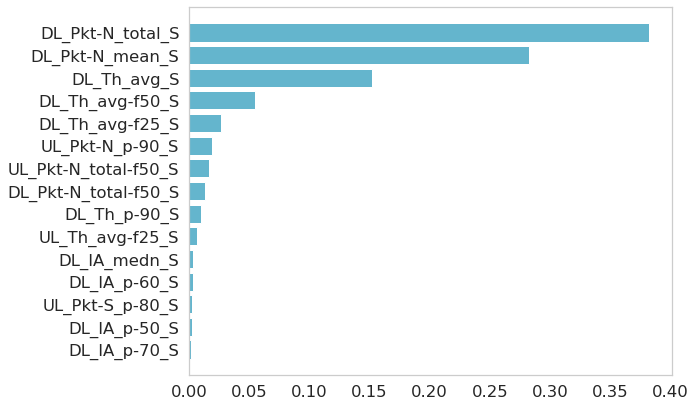

In [40]:
#### importances = model.feature_importances_
indices = np.argsort(importances)
top_k = 15
new_indices = indices[-top_k:]
# fig = plt.figure(figsize=(15, 10))
# plt.rcParams["axes.grid"] = False
# #plt.title('Feature Importances')
# plt.barh(range(len(new_indices)), importances[new_indices], color='c', align='edge')
# plt.yticks(range(len(new_indices)), [F3[i] for i in new_indices])
# #plt.xticks((0, 0.02, 0.07))
# plt.xlabel('Relative Importance')
# #plt.show()
# plt.savefig('b.pdf')
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.grid"] = False
ax = fig.add_subplot(111)
ax.barh(range(len(new_indices)), importances[new_indices], color='c',align='center')
plt.yticks(range(len(new_indices)), [F[i] for i in new_indices])

plt.tight_layout()
#plt.show()
#plt.show()
plt.savefig('quic-mos-reg-15fea.pdf')